In [1]:
import pandas as pd

# PASSENGERS RESULTS

In [108]:
folder = "./outputs/"

In [111]:
area_results = pd.read_csv(folder + "kia_parking_8_Area Results.att", skiprows=38, delimiter=';')

In [112]:
area_results

,$AREAEVALUATION:SIMRUN,TIMEINT,AREA,SPEED(ALL),TMINQUEUEMIN(ALL),TMINQUEUEAVG(ALL),TMINQUEUEMAX(ALL),DENS,EXPERDENS,NEARNEIGHBDISTMIN(ALL),...,NUMPEDSAVG(ALL),NUMPEDSMAX(ALL),NUMPEDSWAITINGPTMIN(ALL),NUMPEDSWAITINGPTAVG(ALL),NUMPEDSWAITINGPTMAX(ALL),WALKINCNT(ALL),WALKOUTCNT(ALL),NUMSTOPS(ALL),STOPTMTOT(ALL),VELVAR(ALL)
0,1,0-300,2,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1,0-300,8,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,1,0-300,9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1,0-300,19,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1,0-300,20,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13355,1,99900-99999,53,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13356,1,99900-99999,54,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13357,1,99900-99999,55,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13358,1,99900-99999,56,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
area_results.columns

Index(['$AREAEVALUATION:SIMRUN', 'TIMEINT', 'AREA', 'SPEED(ALL)',
       'TMINQUEUEMIN(ALL)', 'TMINQUEUEAVG(ALL)', 'TMINQUEUEMAX(ALL)', 'DENS',
       'EXPERDENS', 'NEARNEIGHBDISTMIN(ALL)', 'NEARNEIGHBDISTAVG(ALL)',
       'NEARNEIGHBDISTMAX(ALL)', 'QUEUELENMIN(ALL)', 'QUEUELENAVG(ALL)',
       'QUEUELENMAX(ALL)', 'NUMPEDSMIN(ALL)', 'NUMPEDSAVG(ALL)',
       'NUMPEDSMAX(ALL)', 'NUMPEDSWAITINGPTMIN(ALL)',
       'NUMPEDSWAITINGPTAVG(ALL)', 'NUMPEDSWAITINGPTMAX(ALL)',
       'WALKINCNT(ALL)', 'WALKOUTCNT(ALL)', 'NUMSTOPS(ALL)', 'STOPTMTOT(ALL)',
       'VELVAR(ALL)'],
      dtype='object')

In [114]:
# Define a custom function to convert time intervals to minutes
def convert_time_interval_to_minutes(time_interval):
    start, end = map(int, time_interval.split("-"))
    return start / 60 + (end/60 - start/60) / 2  # Convert start and end to minutes, and calculate the average

# Sort the data based on the converted time intervals
area_results['TIMEINT_MINUTES'] = area_results['TIMEINT'].apply(convert_time_interval_to_minutes)

In [115]:
area_results = area_results.sort_values(by='TIMEINT_MINUTES')

In [116]:
pivot_table_area = pd.pivot_table(area_results, values='STOPTMTOT(ALL)', index='TIMEINT_MINUTES', columns='AREA', fill_value=0)

# Reset the index to make "Time interval" a column
pivot_table_area.reset_index(inplace=True)

# To display the pivot table with "Time interval" as a column
print(pivot_table_area)

AREA  TIMEINT_MINUTES       2    8        9   19   20       21      22   23  \
0                 2.5     0.0  0.0      0.0  0.0  0.0      0.0     0.0  0.0   
1                 7.5     0.0  0.0      0.0  0.0  0.0      0.0     0.0  0.0   
2                12.5   450.2  0.0      0.0  0.0  0.0      0.0     0.0  0.0   
3                17.5  1134.0  0.0    401.9  0.0  0.0      8.0     7.9  0.0   
4                22.5    19.1  0.0   2213.3  0.0  0.0      9.8     9.7  0.0   
..                ...     ...  ...      ...  ...  ...      ...     ...  ...   
285            1427.5   615.2  0.0  35010.8  0.0  0.0  13872.0  5137.3  0.0   
286            1432.5   881.3  0.5  34990.8  0.0  0.0  12667.0  4601.9  0.0   
287            1437.5   293.4  0.0  34293.7  0.0  0.0  11842.5  4398.1  0.0   
288            1442.5   288.0  0.0  33555.8  0.0  0.0  11279.2  3837.8  0.0   
289            1447.5   515.2  0.0  33783.4  0.0  0.0  10483.9  3040.9  0.0   

AREA   24  ...   48   49      50      51      52   

In [117]:
pivot_table_area["TIMEINT"] = pivot_table_area["TIMEINT_MINUTES"].apply(lambda x: f"{int(x)-2}-{int(x)+3}")

In [121]:
output_folder = "./outputs/output_3/"

In [122]:
pivot_table_area.to_csv(output_folder + "area_Results.csv", index=False)

In [5]:
# area_results.to_csv(r"C:\Users\CiSTUP\OneDrive - Indian Institute of Science\vs_codes\vissim_parking\results\kia_parking_Area Results_3.csv", index=False)

# PARKING LOT GROUP RESULTS

In [123]:

parking_results = pd.read_csv(folder + "kia_parking_8_Parking Lot Group Results.att", skiprows=26, delimiter=';')

In [125]:
parking_results

,$PARKINGLOTGROUPEVALUATION:SIMRUN,TIMEINT,PARKINGLOTGROUP,NUMVEHSPARK(ALL),NUMVEHSENTER(ALL),NUMVEHSLEAVE(ALL),OCCUPDURTOT(ALL),PARKDURMIN(ALL),PARKDURMAX(ALL),PARKDURAVG(ALL),OCCUPRATE(ALL),PARKSPCBLOCKDURTOT(ALL),PARKSPCBLOCKRATE(ALL),PARKFEETOT(ALL)
0,1,0-300,5,0,0,0,0.0,NaN,NaN,NaN,0.00 %,0.0,0.00 %,0.0
1,1,0-300,6,0,0,0,0.0,NaN,NaN,NaN,0.00 %,0.0,0.00 %,0.0
2,1,0-300,7,0,0,0,0.0,NaN,NaN,NaN,0.00 %,0.0,0.00 %,0.0
3,1,0-300,8,0,0,0,0.0,NaN,NaN,NaN,0.00 %,0.0,0.00 %,0.0
4,1,0-300,9,0,0,0,0.0,NaN,NaN,NaN,0.00 %,0.0,0.00 %,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17029,1,99900-99999,63,0,0,0,0.0,NaN,NaN,NaN,0.00 %,0.0,0.00 %,0.0
17030,1,99900-99999,64,0,0,0,0.0,NaN,NaN,NaN,0.00 %,0.0,0.00 %,0.0
17031,1,99900-99999,65,0,0,0,0.0,NaN,NaN,NaN,0.00 %,0.0,0.00 %,0.0
17032,1,99900-99999,66,0,0,0,0.0,NaN,NaN,NaN,0.00 %,0.0,0.00 %,0.0


In [126]:
# Sort the data based on the converted time intervals
parking_results['TIMEINT_MINUTES'] = parking_results['TIMEINT'].apply(convert_time_interval_to_minutes)

In [127]:
parking_results = parking_results.sort_values(by='TIMEINT_MINUTES')

In [128]:
parking_results['OCCUPRATE(ALL)'] = parking_results['OCCUPRATE(ALL)'].apply(lambda x: x.replace('%', ''))

In [129]:
parking_results['OCCUPRATE(ALL)'] = parking_results['OCCUPRATE(ALL)'].astype(float)

In [130]:
pivot_table_park = pd.pivot_table(parking_results, values='OCCUPRATE(ALL)', index='TIMEINT_MINUTES', columns='PARKINGLOTGROUP', fill_value=0)

# Reset the index to make "Time interval" a column
pivot_table_park.reset_index(inplace=True)

# To display the pivot table with "Time interval" as a column
print(pivot_table_park)

PARKINGLOTGROUP  TIMEINT_MINUTES    5    6    7    8    9   10   11   12   13  \
0                          2.500  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1                          7.500  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2                         12.500  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3                         17.500  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4                         22.500  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
..                           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
329                     1647.500  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
330                     1652.500  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
331                     1657.500  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
332                     1662.500  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
333                     1665.825  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

PARKINGLOTGROUP  ...      5

In [131]:
import numpy as np

# Assume you want to aggregate 'OCCUPRATE(ALL)' and 'OTHER_COLUMN' values
pivot_table_park = pd.pivot_table(parking_results, 
                                #   values=['OCCUPRATE(ALL)', 'NUMVEHSENTER(ALL)'], 
                                values='OCCUPRATE(ALL)',
                                  index='TIMEINT_MINUTES', 
                                  columns='PARKINGLOTGROUP', 
                                  fill_value=0,
                                  aggfunc=np.mean)  # or any other aggregation function you prefer

# Reset the index to make "Time interval" a column
pivot_table_park.reset_index(inplace=True)

# Display the pivot table
print(pivot_table_park)


PARKINGLOTGROUP  TIMEINT_MINUTES    5    6    7    8    9   10   11   12   13  \
0                          2.500  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1                          7.500  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2                         12.500  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3                         17.500  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4                         22.500  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
..                           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
329                     1647.500  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
330                     1652.500  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
331                     1657.500  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
332                     1662.500  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
333                     1665.825  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

PARKINGLOTGROUP  ...      5

C:\Users\CiSTUP\AppData\Local\Temp\ipykernel_17716\2166027323.py:4: FutureWarning: The provided callable <function mean at 0x00000226CAF5ADE0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table_park = pd.pivot_table(parking_results,


In [132]:
pivot_table_park.columns

Index(['TIMEINT_MINUTES',                 5,                 6,
                       7,                 8,                 9,
                      10,                11,                12,
                      13,                14,                15,
                      18,                20,                21,
                      22,                23,                24,
                      25,                26,                27,
                      28,                29,                30,
                      32,                34,                35,
                      36,                37,                38,
                      39,                47,                48,
                      49,                50,                51,
                      52,                53,                54,
                      55,                56,                57,
                      58,                59,                60,
                      61,               

In [133]:
pivot_table_park.head(3)

PARKINGLOTGROUP,TIMEINT_MINUTES,5,6,7,8,9,10,11,12,13,...,58,59,60,61,62,63,64,65,66,67
0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,70.28,46.82,45.4,74.33,81.42,44.46,61.1,30.47,62.17,37.4
1,7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.00,100.00,100.0,100.00,100.00,100.00,100.0,100.00,100.00,100.0
2,12.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,97.90,100.00,100.0,100.00,100.00,100.00,100.0,100.00,100.00,100.0


In [134]:
pivot_table_park["TIMEINT"] = pivot_table_park["TIMEINT_MINUTES"].apply(lambda x: f"{int(x)-2}-{int(x)+3}")

In [135]:
pivot_table_park.to_csv(output_folder + "parking_lot_groups.csv", index=False)

In [8]:
# parking_results.to_csv(r"C:\Users\CiSTUP\OneDrive - Indian Institute of Science\vs_codes\vissim_parking\results\kia_parking_Parking Lot Group Results_3.csv", index=False)

# QUEUE RESULTS

In [139]:
queue_results = pd.read_csv(folder + "kia_parking_8_Queue Results.att", skiprows=18, delimiter=';', encoding='latin1')


In [140]:
queue_results

,$QUEUECOUNTEREVALUATION:SIMRUN,TIMEINT,QUEUECOUNTER,QLEN,QLENMAX,QSTOPS
0,1,0-300,1,3.12,10.47,5
1,1,0-300,2,0.49,15.46,2
2,1,0-300,3,23.23,59.56,37
3,1,0-300,4,7.07,45.61,15
4,1,0-300,5,0.00,0.00,0
...,...,...,...,...,...,...
3001,1,99900-99999,5,NaN,NaN,0
3002,1,99900-99999,6,NaN,NaN,0
3003,1,99900-99999,7,NaN,NaN,0
3004,1,99900-99999,8,NaN,NaN,0


In [141]:
queue_results.TIMEINT.unique()

array(['0-300', '300-600', '600-900', '900-1200', '1200-1500',
       '1500-1800', '1800-2100', '2100-2400', '2400-2700', '2700-3000',
       '3000-3300', '3300-3600', '3600-3900', '3900-4200', '4200-4500',
       '4500-4800', '4800-5100', '5100-5400', '5400-5700', '5700-6000',
       '6000-6300', '6300-6600', '6600-6900', '6900-7200', '7200-7500',
       '7500-7800', '7800-8100', '8100-8400', '8400-8700', '8700-9000',
       '9000-9300', '9300-9600', '9600-9900', '9900-10200', '10200-10500',
       '10500-10800', '10800-11100', '11100-11400', '11400-11700',
       '11700-12000', '12000-12300', '12300-12600', '12600-12900',
       '12900-13200', '13200-13500', '13500-13800', '13800-14100',
       '14100-14400', '14400-14700', '14700-15000', '15000-15300',
       '15300-15600', '15600-15900', '15900-16200', '16200-16500',
       '16500-16800', '16800-17100', '17100-17400', '17400-17700',
       '17700-18000', '18000-18300', '18300-18600', '18600-18900',
       '18900-19200', '19200-1950

In [142]:
# Define a custom function to convert time intervals to minutes
def convert_time_interval_to_minutes(time_interval):
    start, end = map(int, time_interval.split("-"))
    return start / 60 + (end/60 - start/60) / 2  # Convert start and end to minutes, and calculate the average

# Sort the data based on the converted time intervals
queue_results['TIMEINT_MINUTES'] = queue_results['TIMEINT'].apply(convert_time_interval_to_minutes)

# sorted_data = sorted(queue_results, key=lambda x: convert_time_interval_to_minutes(x["TIMEINT"]))

In [143]:
queue_results = queue_results.sort_values(by='TIMEINT_MINUTES')

In [144]:
queue_results

,$QUEUECOUNTEREVALUATION:SIMRUN,TIMEINT,QUEUECOUNTER,QLEN,QLENMAX,QSTOPS,TIMEINT_MINUTES
0,1,0-300,1,3.12,10.47,5,2.500
1,1,0-300,2,0.49,15.46,2,2.500
2,1,0-300,3,23.23,59.56,37,2.500
3,1,0-300,4,7.07,45.61,15,2.500
4,1,0-300,5,0.00,0.00,0,2.500
...,...,...,...,...,...,...,...
3000,1,99900-99999,4,NaN,NaN,0,1665.825
3001,1,99900-99999,5,NaN,NaN,0,1665.825
3002,1,99900-99999,6,NaN,NaN,0,1665.825
3003,1,99900-99999,7,NaN,NaN,0,1665.825


In [145]:
queue_results.TIMEINT_MINUTES.unique()

array([   2.5  ,    7.5  ,   12.5  ,   17.5  ,   22.5  ,   27.5  ,
         32.5  ,   37.5  ,   42.5  ,   47.5  ,   52.5  ,   57.5  ,
         62.5  ,   67.5  ,   72.5  ,   77.5  ,   82.5  ,   87.5  ,
         92.5  ,   97.5  ,  102.5  ,  107.5  ,  112.5  ,  117.5  ,
        122.5  ,  127.5  ,  132.5  ,  137.5  ,  142.5  ,  147.5  ,
        152.5  ,  157.5  ,  162.5  ,  167.5  ,  172.5  ,  177.5  ,
        182.5  ,  187.5  ,  192.5  ,  197.5  ,  202.5  ,  207.5  ,
        212.5  ,  217.5  ,  222.5  ,  227.5  ,  232.5  ,  237.5  ,
        242.5  ,  247.5  ,  252.5  ,  257.5  ,  262.5  ,  267.5  ,
        272.5  ,  277.5  ,  282.5  ,  287.5  ,  292.5  ,  297.5  ,
        302.5  ,  307.5  ,  312.5  ,  317.5  ,  322.5  ,  327.5  ,
        332.5  ,  337.5  ,  342.5  ,  347.5  ,  352.5  ,  357.5  ,
        362.5  ,  367.5  ,  372.5  ,  377.5  ,  382.5  ,  387.5  ,
        392.5  ,  397.5  ,  402.5  ,  407.5  ,  412.5  ,  417.5  ,
        422.5  ,  427.5  ,  432.5  ,  437.5  ,  442.5  ,  447.

In [146]:

pivot_table = pd.pivot_table(queue_results, values='QLEN', index='TIMEINT_MINUTES', columns='QUEUECOUNTER', fill_value=0)

# Reset the index to make "Time interval" a column
pivot_table.reset_index(inplace=True)

# To display the pivot table with "Time interval" as a column
print(pivot_table)

QUEUECOUNTER  TIMEINT_MINUTES       1      2       3      4      5     6    7  \
0                         2.5    3.12   0.49   23.23   7.07   0.00  0.00  0.0   
1                         7.5   56.41  28.97   90.20  72.49  21.29  0.00  0.0   
2                        12.5  127.08  64.40  126.04  75.35  40.95  0.00  0.0   
3                        17.5  125.53  64.74  123.43  76.42  41.15  0.00  0.0   
4                        22.5  128.35  64.74  101.71  80.56  41.15  3.49  0.0   
..                        ...     ...    ...     ...    ...    ...   ...  ...   
285                    1427.5    0.00   0.00    0.00   0.00   0.00  0.00  0.0   
286                    1432.5    0.00   0.00    0.00   0.00   0.00  0.00  0.0   
287                    1437.5    0.00   0.00    0.00   0.00   0.00  0.00  0.0   
288                    1442.5    0.00   0.00    0.00   0.02   0.00  0.00  0.0   
289                    1447.5   11.31   0.00    0.00   0.00   0.00  0.00  0.0   

QUEUECOUNTER    8      9  


In [147]:
pivot_table["TIMEINT"] = pivot_table["TIMEINT_MINUTES"].apply(lambda x: f"{int(x)-2}-{int(x)+3}")

In [148]:
pivot_table.columns

Index(['TIMEINT_MINUTES', 1, 2, 3, 4, 5, 6, 7, 8, 9, 'TIMEINT'], dtype='object', name='QUEUECOUNTER')

In [149]:
pivot_table.to_csv(output_folder + "Queue_Results.csv", index=False)

# TRAVEL TIME RESULTS

In [150]:
vehicle_times = pd.read_csv(folder + "kia_parking_8_Vehicle Travel Time Results.att", skiprows=18, delimiter=';', encoding='latin1')

In [151]:
# vehicle_times
vehicle_times['TIMEINT_MINUTES'] = vehicle_times['TIMEINT'].apply(convert_time_interval_to_minutes)
vehicle_times = vehicle_times.sort_values(by='TIMEINT_MINUTES')

In [152]:
vehicle_times

,$VEHICLETRAVELTIMEMEASUREMENTEVALUATION:SIMRUN,TIMEINT,VEHICLETRAVELTIMEMEASUREMENT,VEHS(ALL),TRAVTM(ALL),DISTTRAV(ALL),TIMEINT_MINUTES
0,1,0-300,1,7,40484.03,3890.21,2.500
1,1,0-300,2,5,53518.14,3751.90,2.500
2,1,0-300,4,43,5706.97,3752.24,2.500
3,1,0-300,5,7,52767.90,2882.85,2.500
4,1,0-300,6,25,9693.79,2888.04,2.500
...,...,...,...,...,...,...,...
2666,1,99900-99999,4,0,NaN,NaN,1665.825
2667,1,99900-99999,5,0,NaN,NaN,1665.825
2668,1,99900-99999,6,0,NaN,NaN,1665.825
2669,1,99900-99999,7,0,NaN,NaN,1665.825


In [153]:
pivot_table = pd.pivot_table(vehicle_times, values='TRAVTM(ALL)', index='TIMEINT_MINUTES', columns='VEHICLETRAVELTIMEMEASUREMENT', fill_value=0)

# Reset the index to make "Time interval" a column
pivot_table.reset_index(inplace=True)



In [154]:
pivot_table["TIMEINT"] = pivot_table["TIMEINT_MINUTES"].apply(lambda x: f"{int(x)-2}-{int(x)+3}")

In [155]:
pivot_table.to_csv(output_folder + "Vehicle_Travel_Time_Results.csv", index=False)

# Individual vehicle results

In [89]:
vehicle_results = pd.read_csv(folder + "kia_parking_8_001.fzp", skiprows=21, delimiter=';', nrows = 2000)

In [90]:
vehicle_results

,$VEHICLE:SIMSEC,NO,DELAYTM,PARKDURCUR,ROUTENO,WAITDURPARKTOT,PARKDURTOT,ROUTDECNO,CURPARKLOT
0,1.6,1,0.00,NaN,NaN,0.0,0.0,NaN,NaN
1,1.7,1,0.00,NaN,NaN,0.0,0.0,NaN,NaN
2,1.8,1,0.00,NaN,6.0,0.0,0.0,20.0,NaN
3,1.9,1,0.00,NaN,6.0,0.0,0.0,20.0,NaN
4,2.0,1,0.00,NaN,6.0,0.0,0.0,20.0,NaN
...,...,...,...,...,...,...,...,...,...
1995,21.8,15,0.00,NaN,1.0,0.0,0.0,31.0,NaN
1996,21.8,16,0.00,NaN,NaN,0.0,0.0,NaN,NaN
1997,21.8,17,0.00,NaN,1.0,0.0,0.0,31.0,NaN
1998,21.8,18,0.36,NaN,NaN,0.0,0.0,NaN,NaN


In [91]:
# import pandas as pd
 
chunk_size = 100_000  # Define chunk size
skip_rows = 21  # Number of rows to skip initially
last_entries = pd.DataFrame()  # Initialize DataFrame to store last entries
 
# Iterate over chunks
for chunk in pd.read_csv(r"C:\Users\CiSTUP\OneDrive - Indian Institute of Science\vs_codes\vissim_parking\outputs\kia_parking_8_001.fzp", chunksize=chunk_size, skiprows=skip_rows, sep=';'):
    # Skip rows in the first chunk only
    if skip_rows > 0:
        skip_rows = 0
    # print(chunk.columns)
 
    # Find last entry of each unique vehicle number in the chunk
    last_entries_chunk = chunk.groupby('NO').last().reset_index()
 
    # Concatenate last entries of each chunk
    last_entries = pd.concat([last_entries, last_entries_chunk])
 
# Save the last entries to a CSV file
last_entries.to_csv('last_entries.csv', index=False)

In [92]:
output_folder = "./outputs/output_3/"

In [93]:
last_entries.to_csv(output_folder + 'last_entries.csv', index=False)

In [94]:
last_entries.head()

,NO,$VEHICLE:SIMSEC,DELAYTM,PARKDURCUR,ROUTENO,WAITDURPARKTOT,PARKDURTOT,ROUTDECNO,CURPARKLOT
0,1,148.9,0.11,125.4,1.0,0.0,125.4,63.0,NaN
1,2,148.9,0.99,20.0,36.0,0.0,20.0,42.0,NaN
2,3,148.9,4.30,15.3,1.0,0.0,29.9,104.0,NaN
3,4,148.8,0.01,47.7,70.0,0.0,47.7,33.0,NaN
4,5,148.8,6.16,28.5,35.0,0.0,28.5,41.0,NaN


In [95]:
import pandas as pd

In [96]:
vehicles = pd.read_csv(output_folder + 'last_entries.csv')

In [97]:
# vehicles.columns

In [98]:
vehicles_routes = vehicles.groupby('NO')['ROUTDECNO'].nunique()

In [99]:
vehicles_with_multiple_routes = vehicles_routes[vehicles_routes <= 2].index.tolist()
vehicles = vehicles[~vehicles['NO'].isin(vehicles_with_multiple_routes)]

In [100]:
airport_taxi_vehicles = vehicles[vehicles['ROUTDECNO'].isin([198,199,200])]
airport_taxi_list = airport_taxi_vehicles['NO'].unique().tolist()
airport_taxi_vehicles = vehicles[vehicles['NO'].isin(airport_taxi_list)]
airport_taxi_vehicles = airport_taxi_vehicles.groupby('NO').last().reset_index()

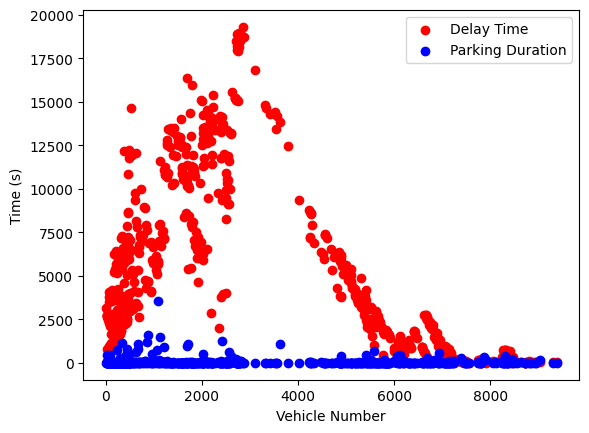

In [101]:
# plot No vs delaytm and parkdurcur in a scatter plot

import matplotlib.pyplot as plt

plt.scatter(airport_taxi_vehicles['NO'], airport_taxi_vehicles['DELAYTM'], c='red', label='Delay Time')
plt.scatter(airport_taxi_vehicles['NO'], airport_taxi_vehicles['PARKDURCUR'], c='blue', label='Parking Duration')
plt.xlabel('Vehicle Number')
plt.ylabel('Time (s)')
plt.legend()
plt.show()

In [102]:
uber_go_vehicles = vehicles[vehicles['ROUTDECNO'].isin([94,95])]
uber_go_list = uber_go_vehicles['NO'].unique().tolist()
uber_go_vehicles = vehicles[vehicles['NO'].isin(uber_go_list)]
uber_go_vehicles = uber_go_vehicles.groupby('NO').last().reset_index()



In [103]:
uber_xl_vehicles = vehicles[vehicles['ROUTDECNO'].isin([143])]
uber_xl_list = uber_xl_vehicles['NO'].unique().tolist()
uber_xl_vehicles = vehicles[vehicles['NO'].isin(uber_xl_list)]
uber_xl_vehicles = uber_xl_vehicles.groupby('NO').last().reset_index()

In [104]:
blusmart_vehicles = vehicles[vehicles['ROUTDECNO'].isin([132])]
blusmart_list = blusmart_vehicles['NO'].unique().tolist()
blusmart_vehicles = vehicles[vehicles['NO'].isin(blusmart_list)]
blusmart_vehicles = blusmart_vehicles.groupby('NO').last().reset_index()

In [105]:
ola_mini_vehicles = vehicles[vehicles['ROUTDECNO'].isin([120])]
ola_mini_list = ola_mini_vehicles['NO'].unique().tolist()
ola_mini_vehicles = vehicles[vehicles['NO'].isin(ola_mini_list)]
ola_mini_vehicles  = ola_mini_vehicles.groupby('NO').last().reset_index()

In [ ]:
# plot No vs delaytm and parkdurcur in a scatter plot

# import matplotlib.pyplot as plt

# plt.scatter(ola_mini_vehicles['NO'], ola_mini_vehicles['DELAYTM'], c='red', label='Delay Time')
# plt.scatter(ola_mini_vehicles['NO'], ola_mini_vehicles['PARKDURCUR'], c='blue', label='Parking Duration')
# plt.xlabel('Vehicle Number')
# plt.ylabel('Time (s)')
# plt.legend()
# plt.show()

In [106]:
ola_suv_vehicles = vehicles[vehicles['ROUTDECNO'].isin([85])]
ola_suv_list = ola_suv_vehicles['NO'].unique().tolist()
ola_suv_vehicles = vehicles[vehicles['NO'].isin(ola_suv_list)]
ola_suv_vehicles = ola_suv_vehicles.groupby('NO').last().reset_index()

In [107]:
# save files
airport_taxi_vehicles.to_csv(output_folder + 'airport_taxi_vehicles.csv', index=False)
uber_go_vehicles.to_csv(output_folder + 'uber_go_vehicles.csv', index=False)
uber_xl_vehicles.to_csv(output_folder + 'uber_xl_vehicles.csv', index=False)
blusmart_vehicles.to_csv(output_folder + 'blusmart_vehicles.csv', index=False)
ola_mini_vehicles.to_csv(output_folder + 'ola_mini_vehicles.csv', index=False)
ola_suv_vehicles.to_csv(output_folder + 'ola_suv_vehicles.csv', index=False)
